In [1]:
%reload_ext autoreload
%autoreload 2

import dgym as dg
import numpy as np
import pandas as pd
from dgym.envs.oracle import DockingOracle

In [2]:
# create docking oracle
config = {
    'center_x': 9.812,
    'center_y': -0.257,
    'center_z': 20.8485,
    'size_x': 14.328,
    'size_y': 8.85,
    'size_z': 12.539,
    'exhaustiveness': 128,
    'max_step': 20,
    'num_modes': 9,
    'scoring': 'vinardo',
    'refine_step': 3,
    'seed': 5
}

docking_oracle = DockingOracle(
    'Mpro affinity',
    receptor_path=f'../../dgym-data/Mpro_prepped.pdbqt',
    config=config
)

In [90]:
import dgym as dg
import numpy as np
import pandas as pd

df = pd.read_csv(
    f'../../dgym-data/COVID_moonshot_data_clean/cdd_achiral_enantiopure_dates_2023_10_18_filt.csv'
)
df = df[df.Semiquant == 'Quant']
df['pIC50'] = -np.log10(df['IC50_(µM)'].astype(float) / 1e6)
df = df[['suspected_SMILES', 'pIC50', 'IC50_(µM)', 'Canonical_PostEra_ID']]
df = df.rename(columns = {'suspected_SMILES': 'smiles', 'IC50_(µM)': 'ic50_uM'})
moonshot = dg.collection.MoleculeCollection([
    dg.molecule.Molecule(s) for s in df['smiles'].tolist()
])

In [64]:
results = docking_oracle(moonshot, path='../../dgym-data/out/docking_results/')

In [68]:
import numpy as np

np.nanargmax(results)

120

In [95]:
results[120]

5.547392845153809

In [105]:
import torch
results = np.clip(results, 4.0, None).ravel().tolist()
df['pIC50 (pred)'] = results

Text(10, 10, '0.0024206685218562374')

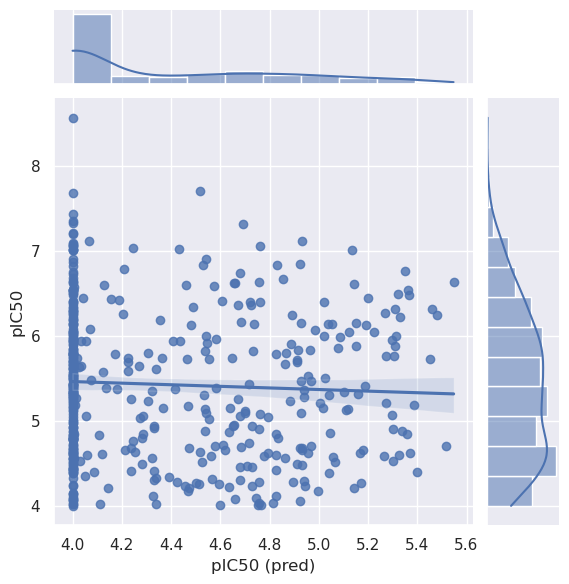

In [107]:
from scipy import stats
import matplotlib.pyplot as plt

def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2

sns.set()
j = sns.jointplot(df.dropna(), x='pIC50 (pred)', y='pIC50', kind="reg")
j.ax_joint.annotate(r2(j.x, j.y), (10, 10))